Methods I'll need: (cz = constrainedzoom)

cz/init.py -> contains the method constraint_vector, which I assume creates the modification...

or maybe the method add_constraint from the cz/methods/geometric.py

cz/methods/filtered -> FilteredZoomConstrained is the main genetIC algorithm

Pseudocode:

Generate Gaussian White Noise (k,x space)
Post Matter Transfer function (k,x space)->pre-filtered
Post-filtered field (k,x space)
Propagate in time??
Pre-modified field
post-modified field

In [9]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import constrainedzoom as cz
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
HIGH = 64
LOW = 32
SCALE = 2
OFFSET = 5
test = cz.methods.filtered.FilteredZoomConstrained(nP=HIGH, nW=LOW, hires_window_scale=SCALE, offset=OFFSET)

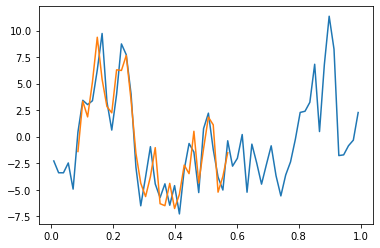

In [11]:
hi, lo = test.realization()
# realization creates random noise, but the results are AFTER the matter transfer function is applied.
pos = test.xs()
plt.plot(pos[0], hi)
plt.plot(pos[1], lo)

Text(0.5, 1.0, 'Unchanged White Noise in Position Space')

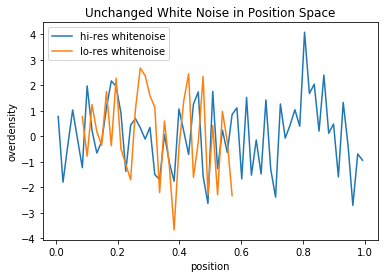

In [12]:
noiseP, noiseW = test._get_whitenoise()
# The noise is in Fourier space, transfer to real space
posnoiseP = noiseP.in_real_space()
posnoiseW = noiseW.in_real_space()
plt.plot(pos[0], posnoiseP, label='hi-res whitenoise')
plt.plot(pos[1], posnoiseW, label='lo-res whitenoise')
plt.legend()
plt.xlabel("position")
plt.ylabel("overdensity")
plt.title("Unchanged White Noise in Position Space")

(array([ 0.,  2.,  2.,  4.,  4.,  6.,  6.,  8.,  8., 10., 10., 12., 12.,
       14., 14., 16., 16., 18., 18., 20., 20., 22., 22., 24., 24., 26.,
       26., 28., 28., 30., 30., 32.]), array([ 0.,  1.,  1.,  2.,  2.,  3.,  3.,  4.,  4.,  5.,  5.,  6.,  6.,
        7.,  7.,  8.,  8.,  9.,  9., 10., 10., 11., 11., 12., 12., 13.,
       13., 14., 14., 15., 15., 16., 16., 17., 17., 18., 18., 19., 19.,
       20., 20., 21., 21., 22., 22., 23., 23., 24., 24., 25., 25., 26.,
       26., 27., 27., 28., 28., 29., 29., 30., 30., 31., 31., 32.]))


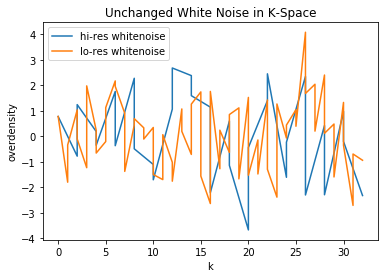

In [13]:
ks = test._get_ks()
plt.plot(ks[0], noiseW, label='hi-res whitenoise')
plt.plot(ks[1], noiseP, label='lo-res whitenoise')
plt.legend()
plt.xlabel("k")
plt.ylabel("overdensity")
# make this an actual P(k) plot, I don't think this is the case right now
# also there seems to be some issue with the k-values given they don't exactly make sense
plt.title("Unchanged White Noise in K-Space")
print(ks)

In [6]:
# import constrainedzoom.plots as czp
# czp.plot_power_spectrum

Text(0.5, 1.0, 'Post-Matter Transfer Function White Noise')

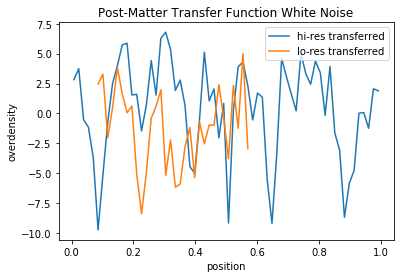

In [7]:
# this gets put into a matter transfer function...
deltaP, deltaW = test._apply_transfer_function(noiseP, noiseW)
delnoiseP = deltaP.in_real_space()
delnoiseW = deltaW.in_real_space()
plt.plot(pos[0], delnoiseP, label='hi-res transferred')
plt.plot(pos[1], delnoiseW, label='lo-res transferred')
plt.legend()
plt.xlabel("position")
plt.ylabel("overdensity")
plt.title("Post-Matter Transfer Function White Noise")